PATH

Importation des packages nécessaires et du jeu de données

A. Evaluation sur les tweets sans traitement

B. Evaluation sur les tweets traités: "Corpus"

C. Evaluation sur les tweets traités avec POS tagging: "Corpus"+"POS tagging"

Résultats


## PATH

In [121]:
file_path_data = 'data/data_clean/'
file_path_models = 'models_training/'

# Importation des packages nécessaires et du jeu de données

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
import pickle

## I. Données et modèles entraînés

In [123]:
df_1 = pd.read_csv(file_path_data+'data_clean.csv', index_col = 0)

In [124]:
# Path des modèles entrainés
trained_model_path = file_path_models+'Best_models_A/'

In [125]:
# Données
X_1 = df_1['text']
y_1 = df_1.target

In [128]:
# Séparation des données
from sklearn.model_selection import train_test_split
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X_1,y_1,test_size=0.2, random_state = 0)

In [129]:
X_test_1

index
10675               can't figure out how to load a picture 
27440     In bed. Still got cracking headache. 3 weeks now 
169327    just back from the city and I am now the proud...
180780    I need to set up tea making facilities in my car 
120093    #ASOT400 Buenos Aires @Argentina, under A stat...
                                ...                        
49428     Stuffed now  just had a pint and steak in the ...
90616     @thomshouse quite sure it wasn't &quot;hacked&...
48264     Is mooooving to the iiiisland! but can't find ...
174711                      @bogarantyu no, he's recovered 
170286    YOU didn't expect this from me on a Saturday m...
Name: text, Length: 39989, dtype: object

## II. Evaluation des modèles

In [130]:
# Créer un dictionnaire qui contient les prédictions
prediction_A = dict()

## 1. Les anciens modèles

In [131]:
# Vectorizer les données
vectorizer = pickle.load(open(trained_model_path+'vectorizer.sav', 'rb'))
X_test_1 = vectorizer.transform(X_test_1)

In [132]:
models_name = ['Logistic', 'Naif bayésien BernoulliNB', 'Decision Tree','Random Forest']
trained_models = ['logreg','ber','dc','rf']

In [133]:
def test(models_name, trained_models, X_test, y_test):
    prediction = dict()
    for i in range(len(models_name)):
        model = pickle.load(open(trained_model_path+trained_models[i]+'.sav', 'rb'))     
        prediction[models_name[i] ] = model.predict(X_test) #save the prediction to dictionary
        print("\n"+"="*40+models_name[i]+"="*40+"\n")
        print("Evaluation détaillée de la Classification par " + models_name[i] +":\n \n", classification_report(y_test,prediction[models_name[i]]))
        confusion_matrix = pd.crosstab(y_test, prediction[models_name[i] ], rownames=['Classe réelle'],colnames=['Classe prédite'])
        print("La matrice de confusion pour la Classification par " + models_name[i] +" :\n \n" ,confusion_matrix)
        accuracy = model.score(X_test, y_test)
        print("Le score pour la Classification par " + models_name[i] + ": ",accuracy)
    return prediction

In [134]:
prediction_A.update(test(models_name, trained_models, X_test_1, y_test_1))


========================================Logistic========================================

Evaluation détaillée de la Classification par Logistic:
 
              precision    recall  f1-score   support

          0       0.80      0.78      0.79     19887
          4       0.78      0.81      0.80     20102

avg / total       0.79      0.79      0.79     39989

La matrice de confusion pour la Classification par Logistic :
 
 Classe prédite      0      4
Classe réelle               
0               15428   4459
4                3892  16210
Le score pour la Classification par Logistic:  0.7911675710820476

========================================Naif bayésien BernoulliNB========================================

Evaluation détaillée de la Classification par Naif bayésien BernoulliNB:
 
              precision    recall  f1-score   support

          0       0.76      0.81      0.78     19887
          4       0.80      0.74      0.77     20102

avg / total       0.78      0.78      0.78 

**Commentaire:** _La grille de recherche nous a permis de retrouver les paramètres optimaux du modèle de régression logistique qui sont: {'C': 0.1, 'penalty': 'l2'}._

**Commentaire:** _Le modèle de régression logistique fournit des résultats très satisfaisants._

**Commentaire:** _Les résultats obtenus avec le modèle naif bayésien BernoulliNB sont également satisfaisants. Le score, la précision et le recall obtenus sont corrects._

**Commentaire:** _Les résultats obtenus avec le modèle arbre de décision sont proches de ceux du knn._

**Commentaire:** _Les résultats obtenus avec le modèle de forêt aléatoire sont satisfaisants._


# 2. Le modèle de Deep Learning MLP entrainé sur 600,000 tweets

In [135]:
## Donnés 
data = pd.read_csv('data/data_raw/twitter_comment.csv',encoding = "ISO-8859-1", names = ["target", "ids", "date", "flag", "user", "text"])
df_2  = pd.concat([data.iloc[0:300000,:], data.iloc[800000:1100000,:]], axis = 0).reset_index(drop = True)

In [136]:
X_2 = df_2['text']
y_2 = df_2.target

In [137]:
# Séparation des données
from sklearn.model_selection import train_test_split
X_train_mlp,X_test_mlp,y_train_mlp,y_test_mlp = train_test_split(X_2,y_2,test_size=0.2, random_state = 0)

In [138]:
vectorizer_mlp = pickle.load(open(trained_model_path+'vectorizer_MLP_600.sav', 'rb'))
X_test_mlp = vectorizer_mlp.transform(X_test_mlp)

In [139]:
mlp = pickle.load(open(trained_model_path+'mlp_cvec_600.sav', 'rb'))

In [140]:
prediction_A['MLP'] = mlp.predict(X_test_mlp)

In [141]:
print("Evaluation détaillée de la Classification par régression logistique :\n \n" ,classification_report(y_test_mlp,prediction_A['MLP']))
confusion_matrix = pd.crosstab(y_test_mlp, prediction_A['MLP'], rownames=['Classe réelle'],colnames=['Classe prédite'])
print("La matrice de confusion pour la Classification par régression logistique :\n \n" ,confusion_matrix)
accuracy = mlp.score(X_test_mlp, y_test_mlp)
print("Le score pour la Classification par régression logistique :",accuracy)

Evaluation détaillée de la Classification par régression logistique :
 
              precision    recall  f1-score   support

          0       0.80      0.81      0.80     59856
          4       0.81      0.80      0.80     60144

avg / total       0.80      0.80      0.80    120000

La matrice de confusion pour la Classification par régression logistique :
 
 Classe prédite      0      4
Classe réelle               
0               48428  11428
4               12210  47934
Le score pour la Classification par régression logistique : 0.8030166666666667


## III. Comparaison des modèles

In [142]:
prediction_A

{'Decision Tree': array([0, 0, 0, ..., 0, 0, 4]),
 'Logistic': array([0, 0, 4, ..., 0, 0, 4]),
 'MLP': array([0, 0, 0, ..., 0, 0, 4]),
 'Naif bayésien BernoulliNB': array([0, 0, 4, ..., 0, 0, 4]),
 'Random Forest': array([0, 0, 4, ..., 0, 0, 0])}

### 1. Matrices de confusion

In [143]:
classes= (0,4)
def plot_confusion_matrix(cm, cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Vrais labels')
    plt.xlabel('Labels prédits')

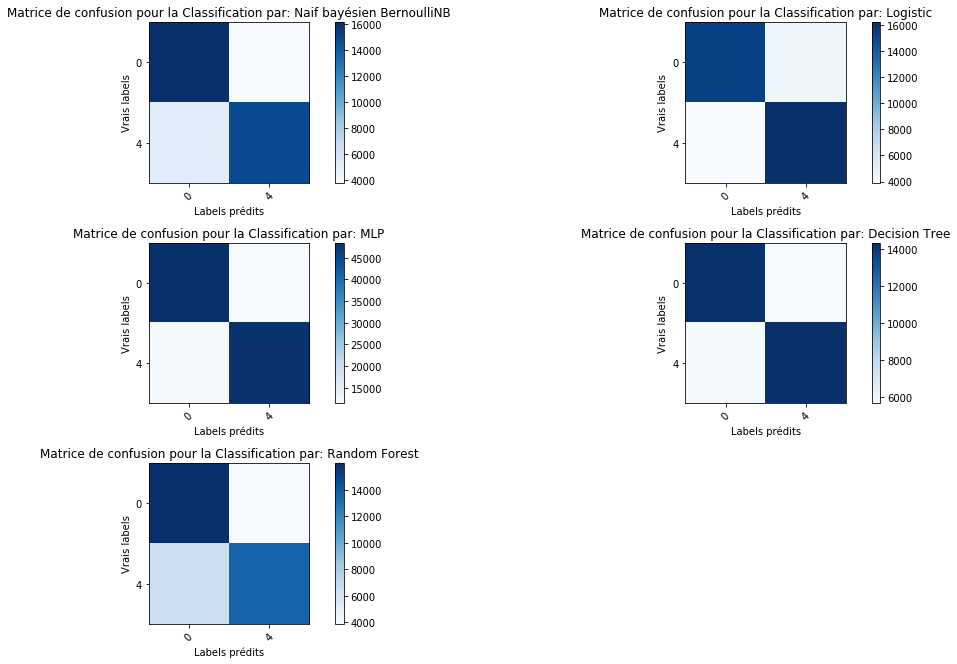

In [146]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(15,15))
i=0
for model, predicted in prediction_A.items():
    i=i+1
    plt.subplot(5,2,i)
    plt.title('Matrice de confusion pour la Classification par: %s'% model)
    if model == 'MLP':
        cm_model = confusion_matrix(y_test_mlp, predicted)
        plot_confusion_matrix(cm_model)
    else:
        cm_model = confusion_matrix(y_test_1, predicted)
        plot_confusion_matrix(cm_model)

**Commentaire:** _Les matrices de confusion colorées reflètent bien les résulats des différents modèles avec une intensité de couleur plus prononcée sur la diagonale pour les méthodes de régression logistique et l'arbre de décision ._

### 2. Courbes de ROC

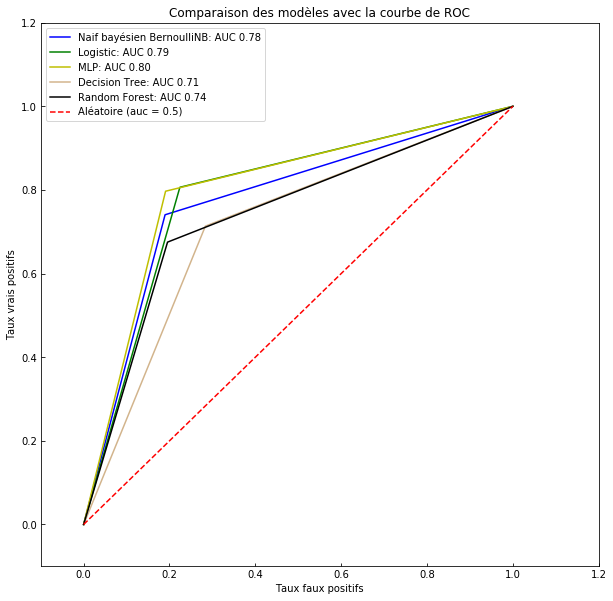

In [148]:
from sklearn.metrics import roc_curve,auc
cmp = 0
colors = ['b', 'g', 'y', 'tan', 'k','c','fuchsia','grey','orange','purple','pink']

plt.figure(figsize=(10,10))
for model, predicted in prediction_A.items():
    if model == 'MLP':
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mlp, predicted,pos_label=4)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
        cmp += 1
    else:
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_1, predicted,pos_label=4)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
        cmp += 1
plt.title('Comparaison des modèles avec la courbe de ROC')
plt.plot([0, 1], [0, 1], color='r',linestyle='--',label='Aléatoire (auc = 0.5)')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('Taux vrais positifs')
plt.xlabel('Taux faux positifs')
plt.legend(loc='best')
plt.tick_params(direction='in')
plt.show()

**Commentaire:** _Ce graphique présente toutes les courbes de ROC des différents modèles. Il confirme les résultats antérieurs avec des modèles bien plus performants que d'autres et notamment: la régression logistique, le naif bayésien et le random forest._  

## Scalability avec les commentaires de movie

In [149]:
file_path_data_scalability = 'data_scalability/movie_reviews/'

In [150]:
mov = pd.read_csv(file_path_data_scalability+'movie_reviews.csv')
mov.rename(columns={"Sentiment": "target", "SentimentText": "text"}, inplace=True)
mov['target'] = mov['target'].replace([1],[4])
X_mov = mov['text']
y_mov = mov.target
X_mov = vectorizer_mlp.transform(X_mov)

In [151]:
mlp.score(X_mov,y_mov)

0.68004